# **Online Shoppers Purchasing Intention Dataset**

In [ ]:
pip install ucimlrepo

In [ ]:
#General and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Machine Learning Model and Splitting
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, roc_auc_score

# **Data Understanding**

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

# data (as pandas dataframes)
x = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

# metadata
print(online_shoppers_purchasing_intention_dataset.metadata)

# variable information
print(online_shoppers_purchasing_intention_dataset.variables)

{'uci_id': 468, 'name': 'Online Shoppers Purchasing Intention Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv', 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 12330, 'num_features': 17, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Revenue'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5F88Q', 'creators': ['C. Sakar', 'Yomi Kastro'], 'intro_paper': {'title': 'Real-time prediction of online shoppers’ purchasing intention using multi

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Revenue  12330 non-null  bool 
dtypes: bool(1)
memory usage: 12.2 KB


In [ ]:
df = pd.concat([x, y], axis =1)

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

# **Data Visualization**

In [ ]:
numerical_column = df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
       'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
        'VisitorType', 'Weekend', 'Revenue']]

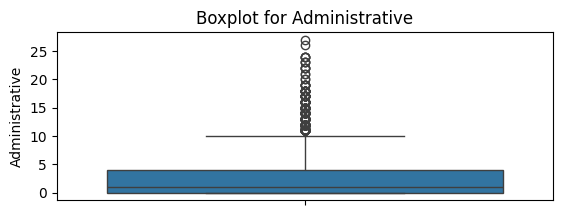

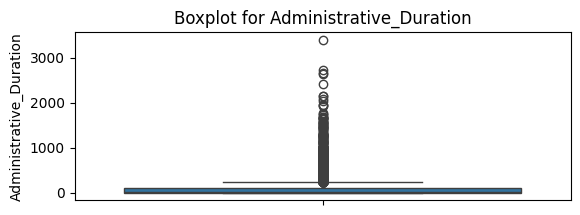

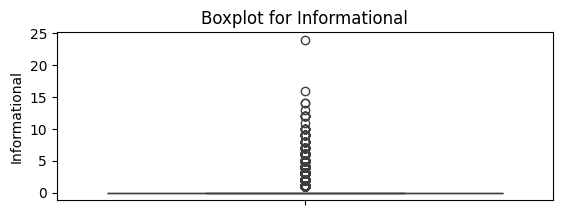

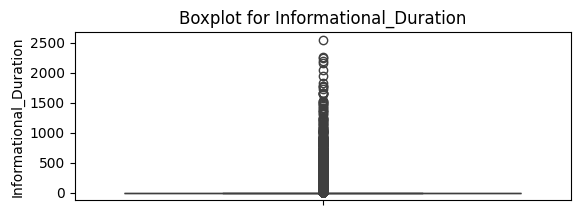

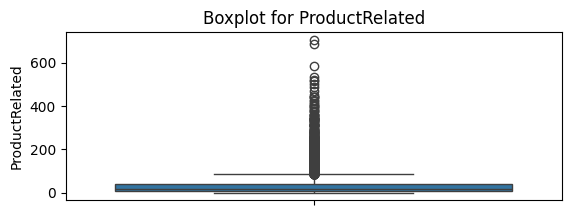

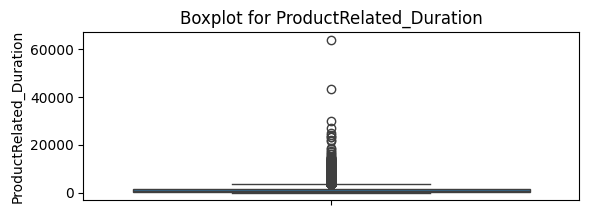

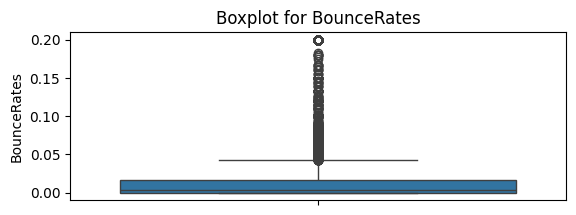

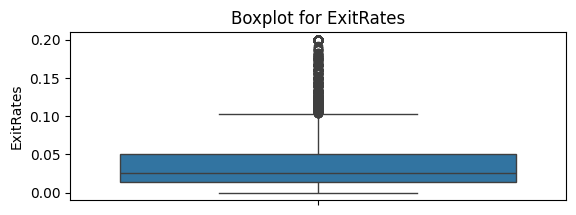

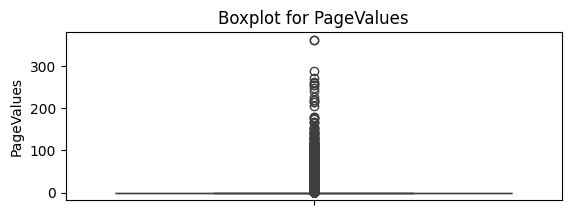

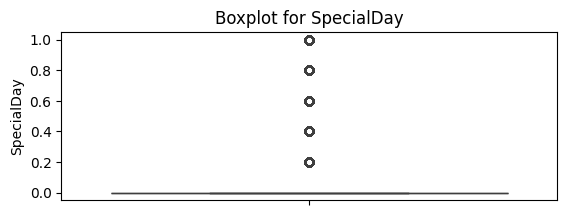

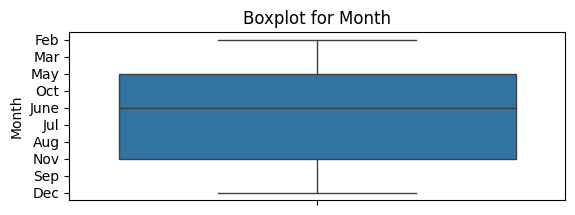

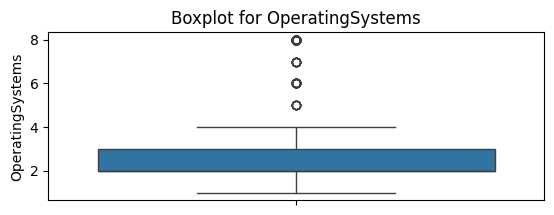

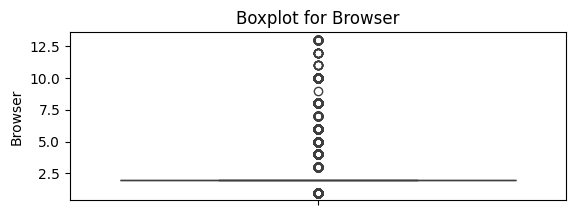

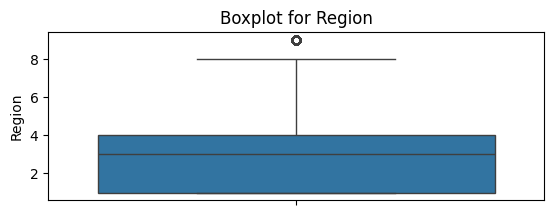

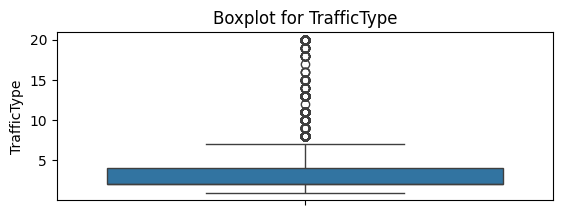

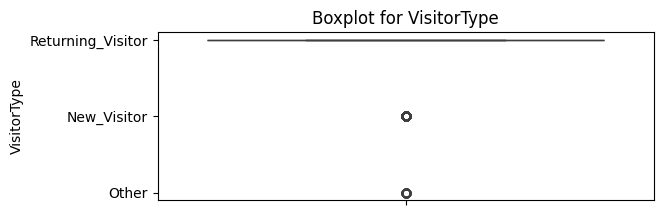

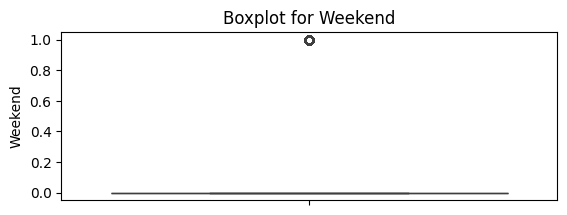

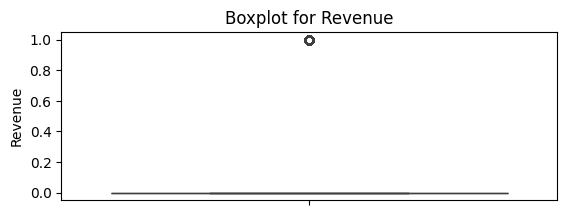

In [ ]:
for col in numerical_column:
  plt.subplot(2,1,1)
  sns.boxplot(numerical_column[col])
  plt.title(f"Boxplot for {col}")
  plt.show()

# **Data Preparation**
1. Mengecek inbalance pada 'Revenue', 'VisitorType' dan 'Weekend'
2. Membuang anomali pada 'VisitorType' dengan label other
3. Mengecek missing value pada dataset
4. Mengubah 'Month' dan 'Visitor Type' dari object ke integer, sedangkan 'Weekend' dan 'Revenue' dari bool ke integer agar bisa mengelompokkan dan memvisualisasi dengan mudah

**Cek inbalance**

<Axes: xlabel='Revenue'>

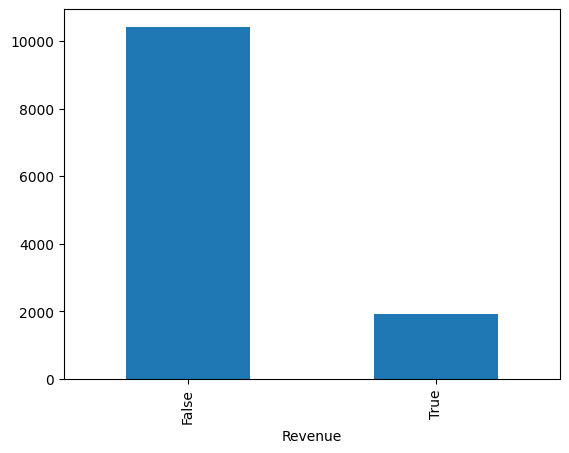

In [ ]:
df.Revenue.value_counts().plot.bar()

<Axes: xlabel='VisitorType'>

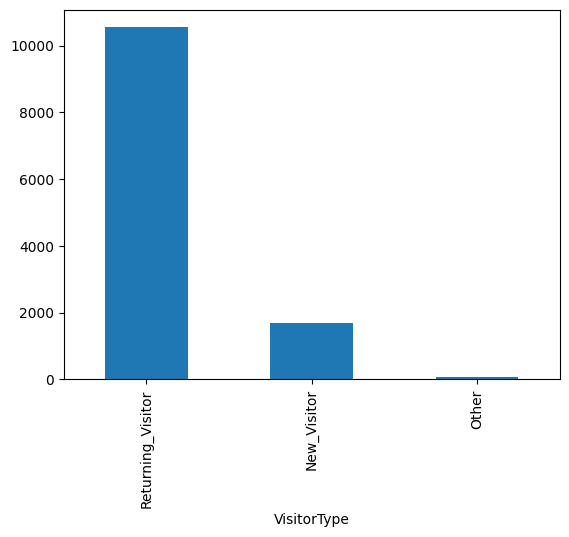

In [ ]:
df.VisitorType.value_counts().plot.bar()

<Axes: xlabel='Weekend'>

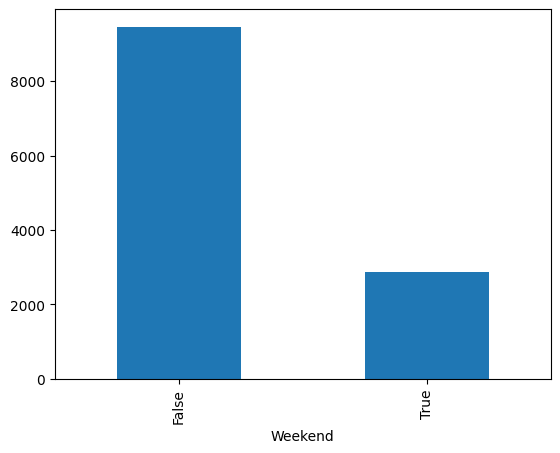

In [ ]:
df.Weekend.value_counts().plot.bar()

Di temukan inbalance pada 'Revenue', 'VisitorType' dan 'Weekend' yang harus dihandling

In [ ]:
# Filter the DataFrame
other_visitors_df = df[df['VisitorType'] == 'Other']

# Display the filtered DataFrame
other_visitors_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5679,0,0.00,4,225.766667,222,9630.209524,0.053355,0.066159,0.0,0.0,June,8,13,9,5,Other,False,False
8006,5,446.25,0,0.000000,18,815.250000,0.000000,0.002500,0.0,0.0,Dec,8,13,9,20,Other,False,False
8105,0,0.00,0,0.000000,8,493.750000,0.000000,0.050000,0.0,0.0,Nov,2,2,4,20,Other,False,False
8115,0,0.00,0,0.000000,7,87.000000,0.000000,0.028571,0.0,0.0,Dec,8,13,9,20,Other,False,False
8187,0,0.00,0,0.000000,4,129.500000,0.000000,0.050000,0.0,0.0,Dec,8,13,9,20,Other,False,False


In [ ]:
df = df[df['VisitorType'] != 'Other']

## **Cek missing value**
Tidak ditemukan missing value pada dataset

In [ ]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12245 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12245 non-null  int64  
 1   Administrative_Duration  12245 non-null  float64
 2   Informational            12245 non-null  int64  
 3   Informational_Duration   12245 non-null  float64
 4   ProductRelated           12245 non-null  int64  
 5   ProductRelated_Duration  12245 non-null  float64
 6   BounceRates              12245 non-null  float64
 7   ExitRates                12245 non-null  float64
 8   PageValues               12245 non-null  float64
 9   SpecialDay               12245 non-null  float64
 10  Month                    12245 non-null  object 
 11  OperatingSystems         12245 non-null  int64  
 12  Browser                  12245 non-null  int64  
 13  Region                   12245 non-null  int64  
 14  TrafficType              12

## **Mengelompokkan dan mengubah tipe data**
**1. Month**

In [ ]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [ ]:
def Month_category(Month):
  if(Month == 'Feb'):
    return '2'
  elif(Month == 'Mar'):
    return '3'
  elif(Month == 'May'):
    return '5'
  elif(Month == 'June'):
    return '6'
  elif(Month == 'Jul'):
    return '7'
  elif(Month == 'Aug'):
    return '8'
  elif(Month == 'Sep'):
    return '9'
  elif(Month == 'Oct'):
    return '10'
  elif(Month == 'Nov'):
    return '11'
  else:
    return '12'

In [ ]:
df['Month_category'] = df['Month'].apply(Month_category)

In [ ]:
df = df.drop(columns = 'Month')

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Month_category
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,Returning_Visitor,False,False,2
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,Returning_Visitor,False,False,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,Returning_Visitor,False,False,2
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,Returning_Visitor,False,False,2
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,Returning_Visitor,True,False,2


In [ ]:
def mth(month):
  month = month.replace(',', '')
  month = int(month)
  return month

In [ ]:
df['Month_category'] = df['Month_category'].apply(mth)

**2. Visitor Type**

In [ ]:
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['VisitorType_Encoded'] = le.fit_transform(df['VisitorType'])

In [ ]:
df = df.drop(columns = 'VisitorType')

**3. Weekend**

In [ ]:
df['Weekend'].unique()

array([False,  True])

In [ ]:
df['Weekend_Encoded'] = le.fit_transform(df['Weekend'])

In [ ]:
df = df.drop(columns = 'Weekend')

**4. Revenue**

In [ ]:
df['Revenue'].unique()

array([False,  True])

In [ ]:
df['Revenue_Encoded'] = le.fit_transform(df['Revenue'])

In [ ]:
df = df.drop(columns = 'Revenue')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12245 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12245 non-null  int64  
 1   Administrative_Duration  12245 non-null  float64
 2   Informational            12245 non-null  int64  
 3   Informational_Duration   12245 non-null  float64
 4   ProductRelated           12245 non-null  int64  
 5   ProductRelated_Duration  12245 non-null  float64
 6   BounceRates              12245 non-null  float64
 7   ExitRates                12245 non-null  float64
 8   PageValues               12245 non-null  float64
 9   SpecialDay               12245 non-null  float64
 10  OperatingSystems         12245 non-null  int64  
 11  Browser                  12245 non-null  int64  
 12  Region                   12245 non-null  int64  
 13  TrafficType              12245 non-null  int64  
 14  Month_category           12

In [ ]:
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Month_category,VisitorType_Encoded,Weekend_Encoded,Revenue_Encoded
8200,2,21.25,0,0.0,15,305.208333,0.000000,0.010784,0.000000,0.0,2,4,7,2,11,1,0,0
1168,0,0.00,0,0.0,3,39.666667,0.000000,0.033333,0.000000,0.0,2,4,1,10,3,1,0,0
9073,4,54.50,0,0.0,3,21.000000,0.000000,0.033333,0.000000,0.0,1,1,2,2,11,0,0,0
9891,0,0.00,0,0.0,14,272.166667,0.000000,0.025000,0.000000,0.0,3,2,3,2,12,1,0,0
9206,2,67.50,0,0.0,11,294.000000,0.000000,0.009091,0.000000,0.0,1,1,3,8,12,1,1,0
9002,0,0.00,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,8,8,11,11,1,1,0
9885,2,77.70,1,2.0,24,551.158333,0.004167,0.054444,7.945368,0.0,2,2,9,2,12,1,0,0
7883,3,75.60,0,0.0,14,178.590000,0.012500,0.006250,0.000000,0.0,3,2,1,4,8,1,1,0
9975,3,875.00,0,0.0,34,780.791667,0.000000,0.015676,0.000000,0.0,4,2,3,2,12,1,1,0
4054,0,0.00,0,0.0,6,56.500000,0.066667,0.116667,0.000000,0.0,2,6,1,3,5,1,1,0


## **Visualisasi heatmap**
Untuk melihat korelasi antar value

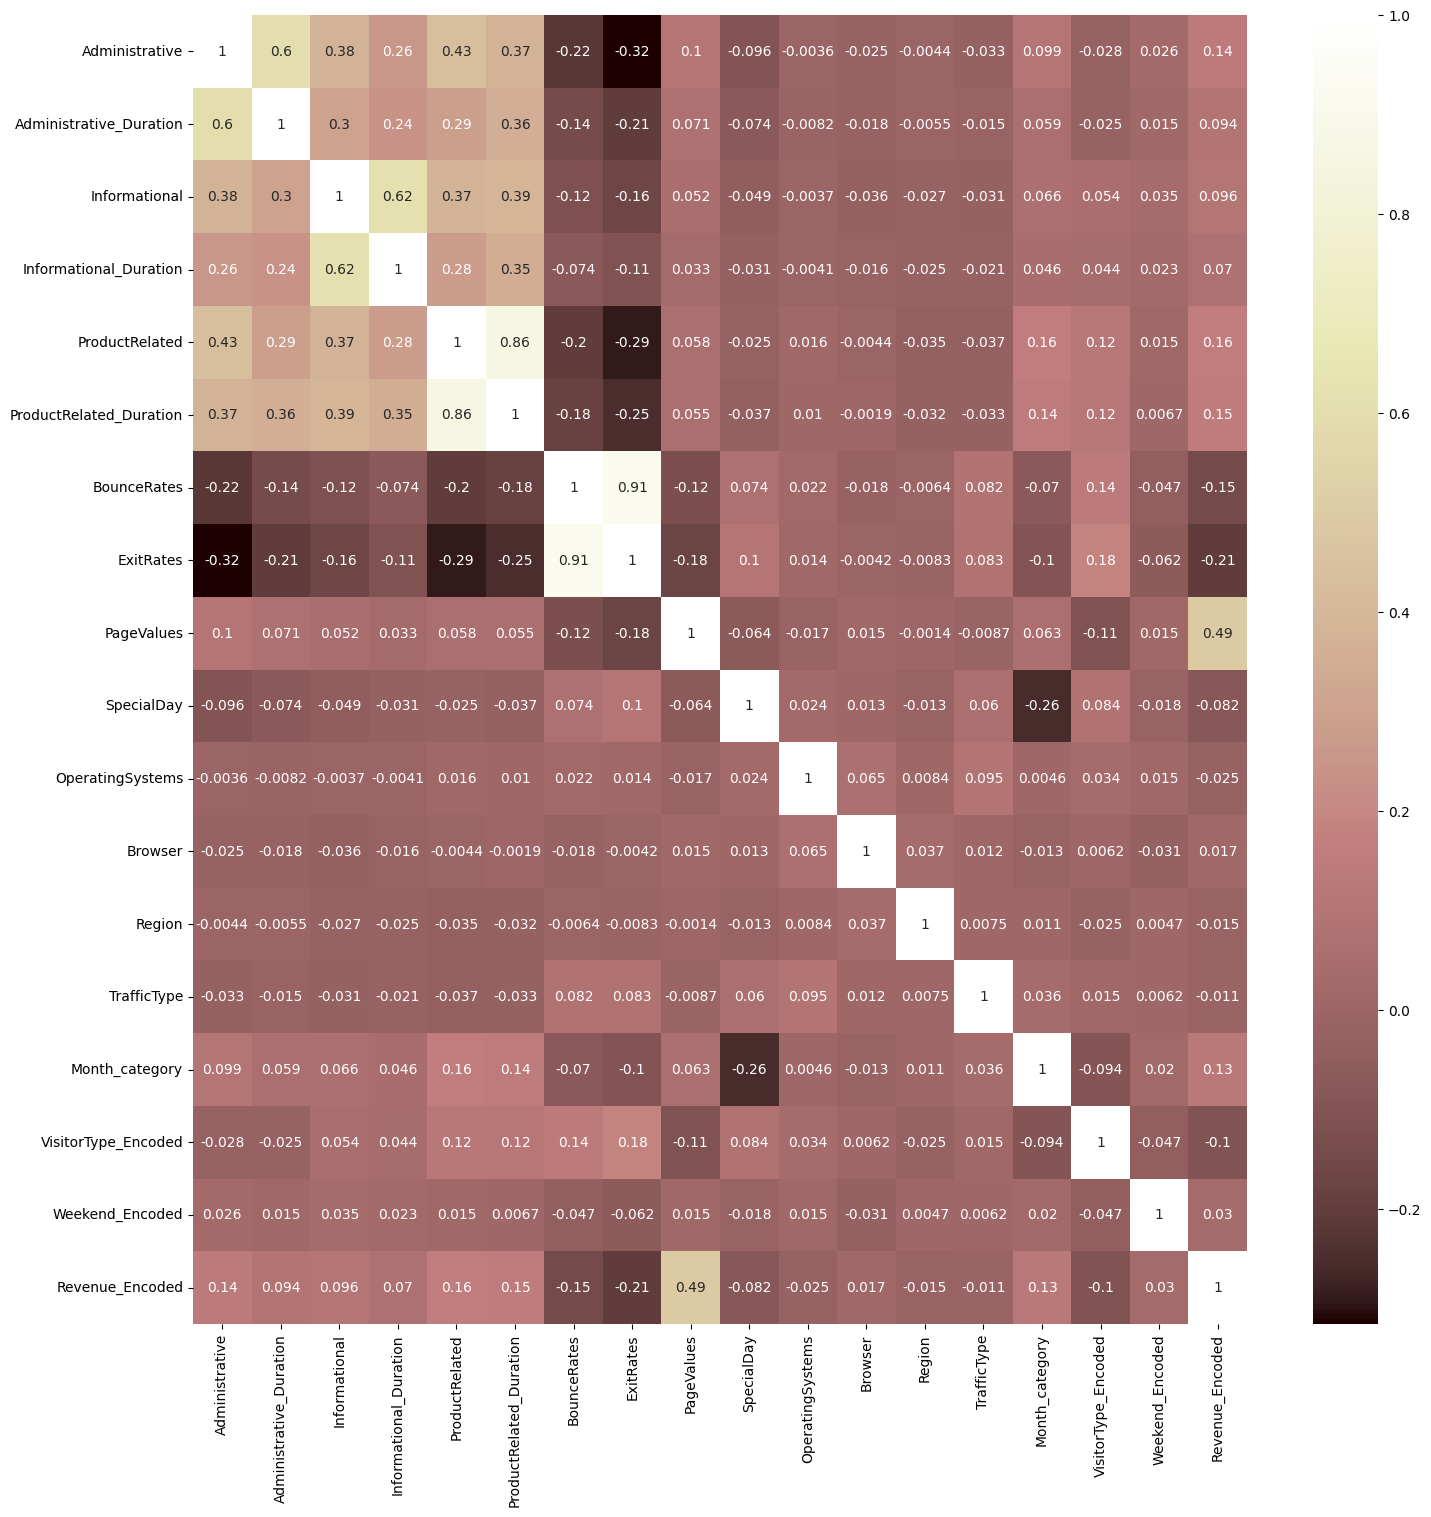

In [ ]:
plt.figure(figsize = (17, 17))
sns.heatmap(df.corr(), annot = True, cmap = 'pink')
plt.show()

Drop column yang sedikit berkorelasi dengan revenue

In [ ]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'Month_category', 'VisitorType_Encoded', 'Weekend_Encoded',
       'Revenue_Encoded'],
      dtype='object')

In [ ]:
dfcorr = df.drop(columns = ['Administrative_Duration', 'Informational', 'Informational_Duration', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend_Encoded'])

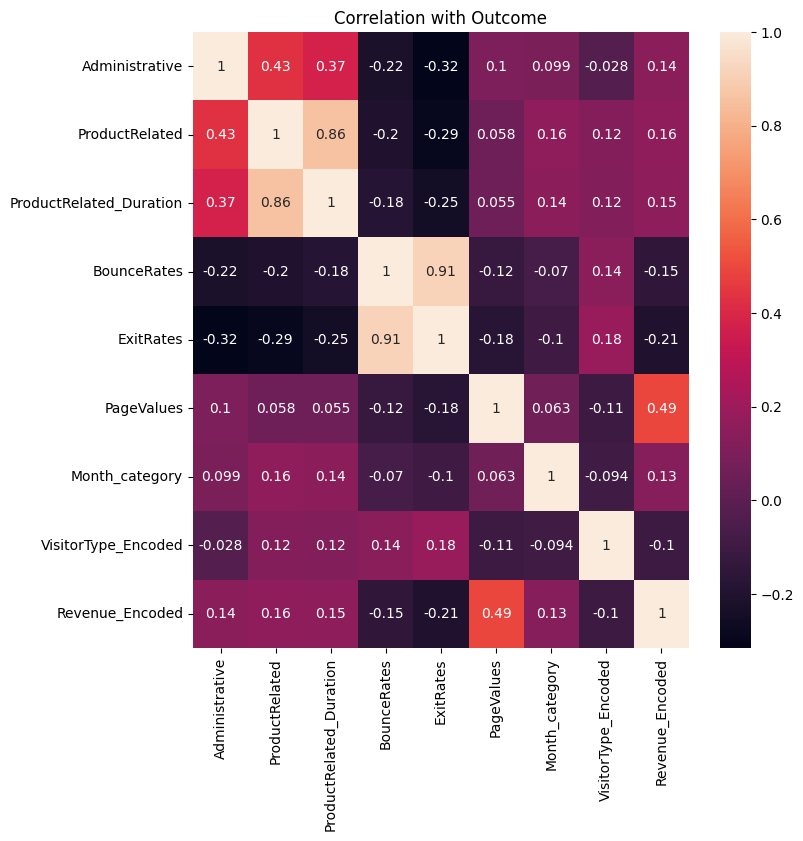

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(dfcorr.corr(), annot=True)
plt.title('Correlation with Outcome')
plt.show()

# **Model and Evaluation**

In [ ]:
x = dfcorr.drop(['Revenue_Encoded'], axis=1)
y = dfcorr['Revenue_Encoded']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

test_size -> total data brp banyak yang dipake buat test 0,2 = 20%

In [ ]:
def modelling(model, title = "Default"):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Accuracy', title, ':', accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [ ]:
# KNN
knn = KNeighborsClassifier()
modelling(knn, "KNN")

# XgBoost
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
modelling(xgb, "XgBoost")

# Decission Tree Regressor
dtr = DecisionTreeRegressor()
# modelling(dtr, "Decission Tree Regressor")

# Random Forest
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=42)
modelling(rf, "Random Forest")

# Logistic Regression
lr = LogisticRegression()
modelling(lr, "Logistic Regression")

# Decission Tree Classifier
dtc = DecisionTreeClassifier()
modelling(dtc, "Decission trees")

# Ada Boost
ada = AdaBoostClassifier(base_estimator=dtc)

# SVC
from sklearn.svm import SVC
svc = SVC(kernel='linear')
modelling(svc, "SVC")

# Gradient Boosting
gb = GradientBoostingClassifier()
modelling(gb, "Gradient Boosting")

# Naive Bayes
gnb = GaussianNB()
modelling(gnb, "Gaussian Naive Bayes")
mnb = MultinomialNB()
modelling(mnb, "Multinomial Naive Bayes")

Accuracy KNN : 0.8668844426296447
Accuracy XgBoost : 0.8832176398530013
Accuracy Random Forest : 0.8954675377705186


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Logistic Regression : 0.8775010208248265
Accuracy Decission trees : 0.8566761943650469
Accuracy SVC : 0.8787260106165782
Accuracy Gradient Boosting : 0.8975091874234381
Accuracy Gaussian Naive Bayes : 0.8632094732543896
Accuracy Multinomial Naive Bayes : 0.8832176398530013


Model terbagus -> Gradient Boosting

In [ ]:
from sklearn.metrics import f1_score

gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred, average='micro'))
print(classification_report(y_test, y_pred))

Accuracy: 0.8975091874234381
f1 score:  0.8975091874234381
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2065
           1       0.69      0.62      0.66       384

    accuracy                           0.90      2449
   macro avg       0.81      0.79      0.80      2449
weighted avg       0.89      0.90      0.90      2449



Dikarenakan terdapat imbalanced data seperti yang sudah diketahui di awal, kami menggunakan NearMiss yang merupakan salah satu teknik under-sampling untuk resampling data agar mengatasi ketidakseimbangan pada data.

# **Algoritma NearMiss**
NearMiss adalah algoritma yang bertujuan untuk menyeimbangkan dataset dengan memilih subset dari kelas mayoritas yang paling dekat dengan kelas minoritas berdasarkan jarak tertentu. Metode ini fokus pada penghapusan sampel dari kelas mayoritas untuk mencapai keseimbangan dengan kelas minoritas.

NearMiss mengurangi jumlah sampel dari kelas mayoritas dengan cara yang terstruktur, membantu model untuk belajar dari dataset yang lebih seimbang. Setelah proses ini, masalah ketidakseimbangan pada data sudah teratasi dan dataset siap untuk digunakan dalam proses modeling.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred, average='micro'))
print(classification_report(y_test, y_pred))

Accuracy: 0.9026078557630393
f1 score:  0.9026078557630393
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      3087
           1       0.90      0.91      0.90      3125

    accuracy                           0.90      6212
   macro avg       0.90      0.90      0.90      6212
weighted avg       0.90      0.90      0.90      6212



In [ ]:
from imblearn.under_sampling import TomekLinks

rus = TomekLinks()
x_resampled, y_resampled = rus.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred, average='micro'))
print(classification_report(y_test, y_pred))

Accuracy: 0.907312925170068
f1 score:  0.9073129251700681
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2938
           1       0.75      0.66      0.70       590

    accuracy                           0.91      3528
   macro avg       0.84      0.81      0.82      3528
weighted avg       0.90      0.91      0.90      3528



In [ ]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
x_resampled, y_resampled = smote_enn.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred, average='micro'))
print(classification_report(y_test, y_pred))

Accuracy: 0.9575634517766497
f1 score:  0.9575634517766497
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2251
           1       0.96      0.96      0.96      2674

    accuracy                           0.96      4925
   macro avg       0.96      0.96      0.96      4925
weighted avg       0.96      0.96      0.96      4925



In [ ]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()
x_resampled, y_resampled = nm.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred, average='micro'))
print(classification_report(y_test, y_pred))

Accuracy: 0.9577464788732394
f1 score:  0.9577464788732394
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       596
           1       0.97      0.94      0.95       540

    accuracy                           0.96      1136
   macro avg       0.96      0.96      0.96      1136
weighted avg       0.96      0.96      0.96      1136



Menggunakan Algoritma NearMiss yang lebih unggul dibanding SMOTE, TomekLinks dan SMOTEENN dan melakukan KFold untuk cross validation dan melihat apakah terjadi overfitting pada model

# **K-Fold Cross Validation**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

#Cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(gb, x_resampled, y_resampled, cv=kf)
print("Cross Validation Score using k-Fold:\n", scores)

Cross Validation Score using k-Fold:
 [0.95640687 0.96169089 0.96433289 0.95772787 0.9484127 ]


# **Confusion Matrix**

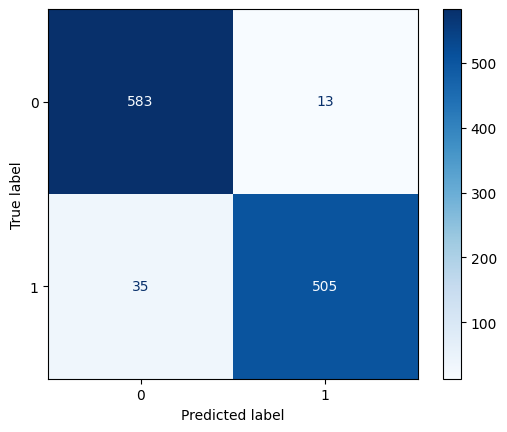

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()